# 6.6 Sourcing & Analyzing Time-Series Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Define path
path = r'C:\Users\ASUS\World Happiness Report 04.2024\02 Data\Prepared Data'

In [3]:
# Load the pickle file
df_World = pd.read_pickle(os.path.join(path, 'df_World_62.pkl'))

In [4]:
df_World.columns


Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Score category'],
      dtype='object')

In [5]:
data_types = {'year': 'datetime64'}


In [6]:
file_path = os.path.join(path, 'df_World_62.pkl')


In [7]:
happiness_dates = ['year']


In [8]:
df_World['year'] = pd.to_datetime(df_World['year'], format='%Y')

In [9]:
df_World.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Country name                      1949 non-null   object        
 1   year                              1949 non-null   datetime64[ns]
 2   Life Ladder                       1949 non-null   float64       
 3   Log GDP per capita                1949 non-null   float64       
 4   Social support                    1949 non-null   float64       
 5   Healthy life expectancy at birth  1949 non-null   float64       
 6   Freedom to make life choices      1949 non-null   float64       
 7   Generosity                        1949 non-null   float64       
 8   Perceptions of corruption         1949 non-null   float64       
 9   Positive affect                   1949 non-null   float64       
 10  Negative affect                   1949 non-null 

### 2. Subsetting, wrangling, and cleaning time-series data

In [10]:
year_counts = df_World.groupby( df_World['year'].dt.date)['year'].count()

In [11]:
year_counts

year
2005-01-01     27
2006-01-01     89
2007-01-01    102
2008-01-01    110
2009-01-01    114
2010-01-01    124
2011-01-01    146
2012-01-01    142
2013-01-01    137
2014-01-01    145
2015-01-01    143
2016-01-01    142
2017-01-01    147
2018-01-01    142
2019-01-01    144
2020-01-01     95
Name: year, dtype: int64

In [12]:
#avg duration happiness on year
avg_happiness_year = df_World.groupby('year')['Life Ladder'].mean()

In [13]:
avg_happiness_year

year
2005-01-01    6.446259
2006-01-01    5.196899
2007-01-01    5.418275
2008-01-01    5.418509
2009-01-01    5.457667
2010-01-01    5.496806
2011-01-01    5.424082
2012-01-01    5.443754
2013-01-01    5.394562
2014-01-01    5.389021
2015-01-01    5.404035
2016-01-01    5.399479
2017-01-01    5.460408
2018-01-01    5.499444
2019-01-01    5.570868
2020-01-01    5.840600
Name: Life Ladder, dtype: float64

In [14]:
result = pd.DataFrame({
    'year': year_counts.index, 
    'Life Ladder': year_counts.values, 
    'avg_happiness': avg_happiness_year.values
})
print(result)

          year  Life Ladder  avg_happiness
0   2005-01-01           27       6.446259
1   2006-01-01           89       5.196899
2   2007-01-01          102       5.418275
3   2008-01-01          110       5.418509
4   2009-01-01          114       5.457667
5   2010-01-01          124       5.496806
6   2011-01-01          146       5.424082
7   2012-01-01          142       5.443754
8   2013-01-01          137       5.394562
9   2014-01-01          145       5.389021
10  2015-01-01          143       5.404035
11  2016-01-01          142       5.399479
12  2017-01-01          147       5.460408
13  2018-01-01          142       5.499444
14  2019-01-01          144       5.570868
15  2020-01-01           95       5.840600


In [15]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           16 non-null     object 
 1   Life Ladder    16 non-null     int64  
 2   avg_happiness  16 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 516.0+ bytes


In [16]:
from datetime import datetime

result['datetime'] = pd.to_datetime(result['year'], format='%Y')  # Create a datetime column from 'year'
result = result.set_index('datetime')  # Set the datetime as the index of the DataFrame
result.drop(['year'], axis=1, inplace=True)  # Drop the 'year' column

In [17]:
print(result.head())

            Life Ladder  avg_happiness
datetime                              
2005-01-01           27       6.446259
2006-01-01           89       5.196899
2007-01-01          102       5.418275
2008-01-01          110       5.418509
2009-01-01          114       5.457667


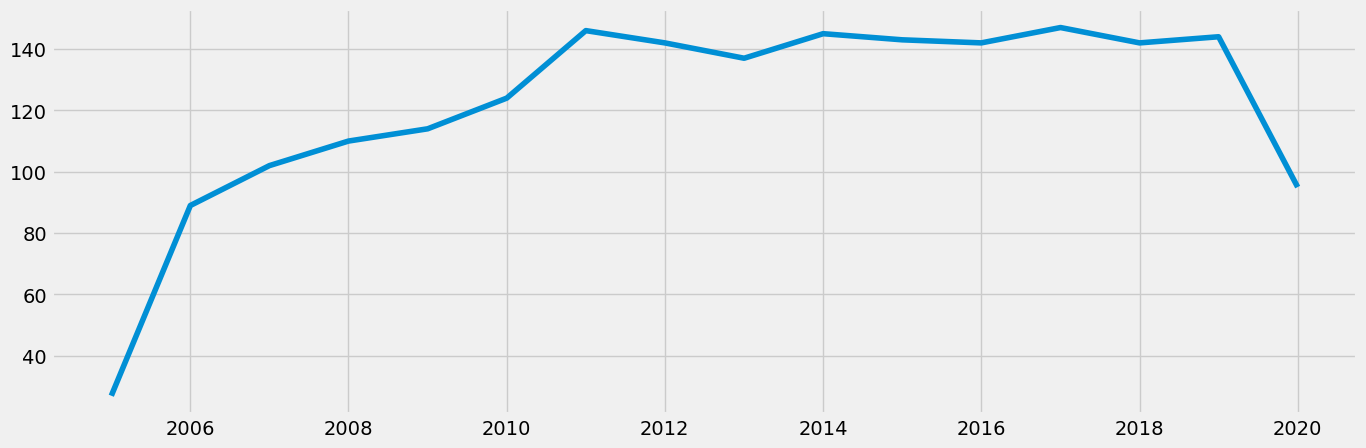

In [18]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(year_counts)

In [19]:
# Check for missing values (you shouldn't have any)

year_counts.isnull().sum() 

0

In [20]:
# Check for duplicates

dups = year_counts.duplicated()
dups.sum()



2

In [21]:
# Check for duplicates
dups = year_counts.duplicated()

# Display duplicate entries
duplicate_years = year_counts[dups]
print("Duplicate Years:")
print(duplicate_years)

Duplicate Years:
year
2016-01-01    142
2018-01-01    142
Name: year, dtype: int64


### 3. Time-series analysis: decomposition

In [22]:
result

,Life Ladder,avg_happiness
datetime,,
2005-01-01,27,6.446259
2006-01-01,89,5.196899
2007-01-01,102,5.418275
2008-01-01,110,5.418509
2009-01-01,114,5.457667
2010-01-01,124,5.496806
2011-01-01,146,5.424082
2012-01-01,142,5.443754
2013-01-01,137,5.394562


In [23]:
column_to_drop = 'avg_happiness'

In [24]:
result = result.drop(column_to_drop, axis=1)

In [25]:
# Reset index so that you can use the "Date" column as a filter

result_1 = result.reset_index()

In [27]:
result_1

,datetime,Life Ladder
0,2005-01-01,27
1,2006-01-01,89
2,2007-01-01,102
3,2008-01-01,110
4,2009-01-01,114
5,2010-01-01,124
6,2011-01-01,146
7,2012-01-01,142
8,2013-01-01,137
9,2014-01-01,145


In [28]:
time_series = result_1['Life Ladder']

In [29]:
result_1['datetime'] = pd.to_datetime(result_1['datetime'])

In [30]:
result_1.set_index('datetime', inplace=True)

In [33]:
result_1.index.freq = 'AS-JAN'

In [34]:
time_series = result_1['Life Ladder']

In [39]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(result_1, model='additive')

In [40]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

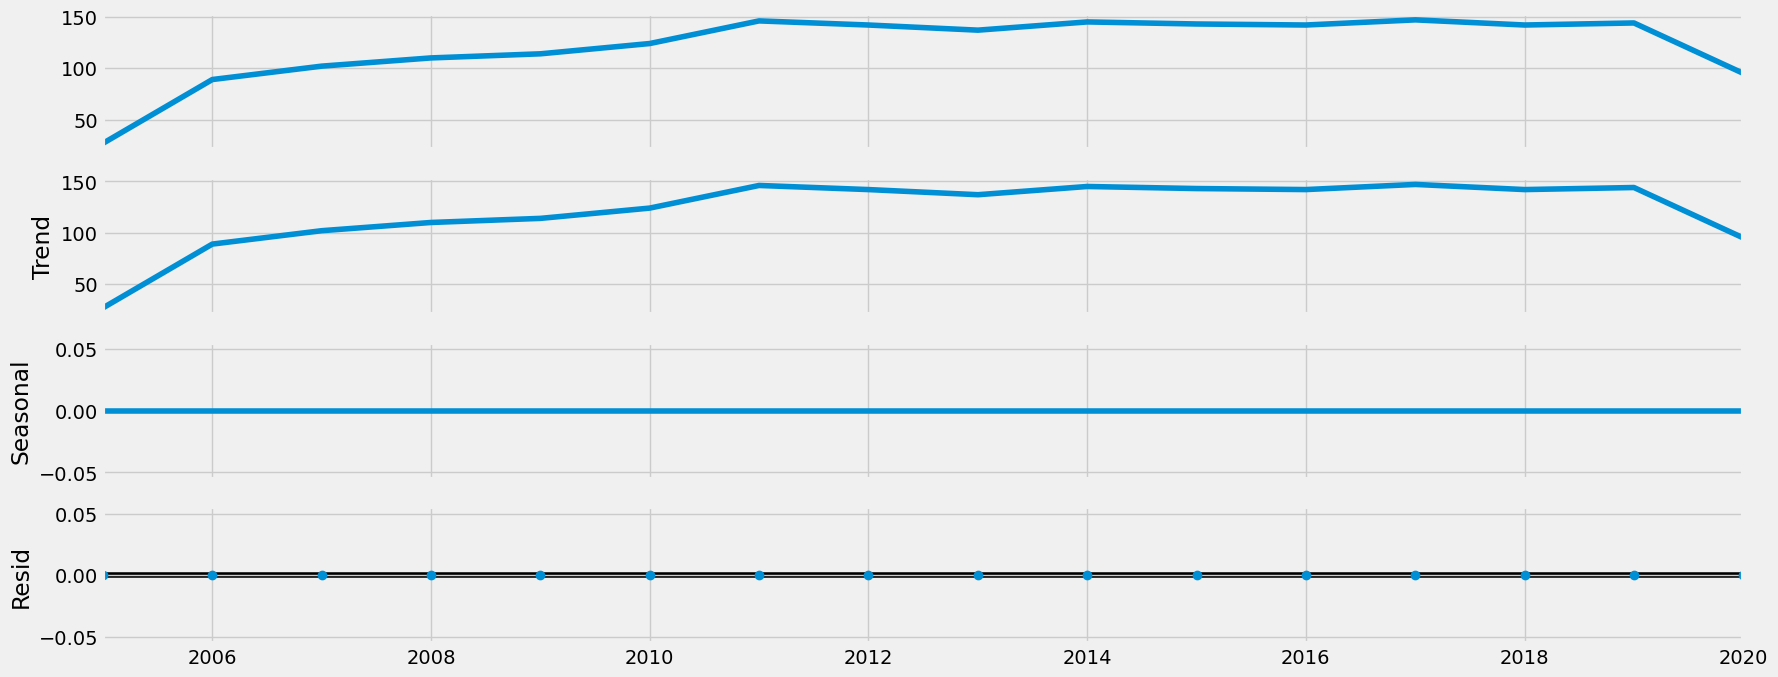

In [41]:
# Plot the separate components

decomposition.plot()
plt.show()

### 4. Testing for stationarity

In [43]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result_1['Life Ladder'])

Dickey-Fuller Stationarity test:
Test Statistic                 -4.472355
p-value                         0.000221
Number of Lags Used             0.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


Dickey-Fuller Stationarity test:

#### Test Statistic: The test statistic value from the Dickey-Fuller test. More negative values indicate stronger evidence against the null hypothesis (that the time series is non-stationary).
Test Statistic                 -4.472355

#### p-value: The p-value associated with the test statistic. It indicates the probability of observing a test statistic as extreme as the one computed from the data, assuming the null hypothesis is true (i.e., the time series is non-stationary). A low p-value suggests rejecting the null hypothesis.
p-value                         0.000221

#### Number of Lags Used: The number of lags used in the regression when computing the test statistic. This is determined automatically based on the AIC criterion.
Number of Lags Used             0.000000

#### Number of Observations Used: The number of observations used in the test. This depends on the length of the time series and the number of lags used.
Number of Observations Used    15.000000

####  Critical Values: These are the critical values for different confidence levels (1%, 5%, and 10%). They represent the thresholds beyond which we reject the null hypothesis. If the test statistic is less extreme than these critical values, we fail to reject the null hypothesis.
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814

These results suggest that the time series is likely stationary, given the low p-value and the test statistic below the critical values at the 1%, 5%, and 10% levels of significance.

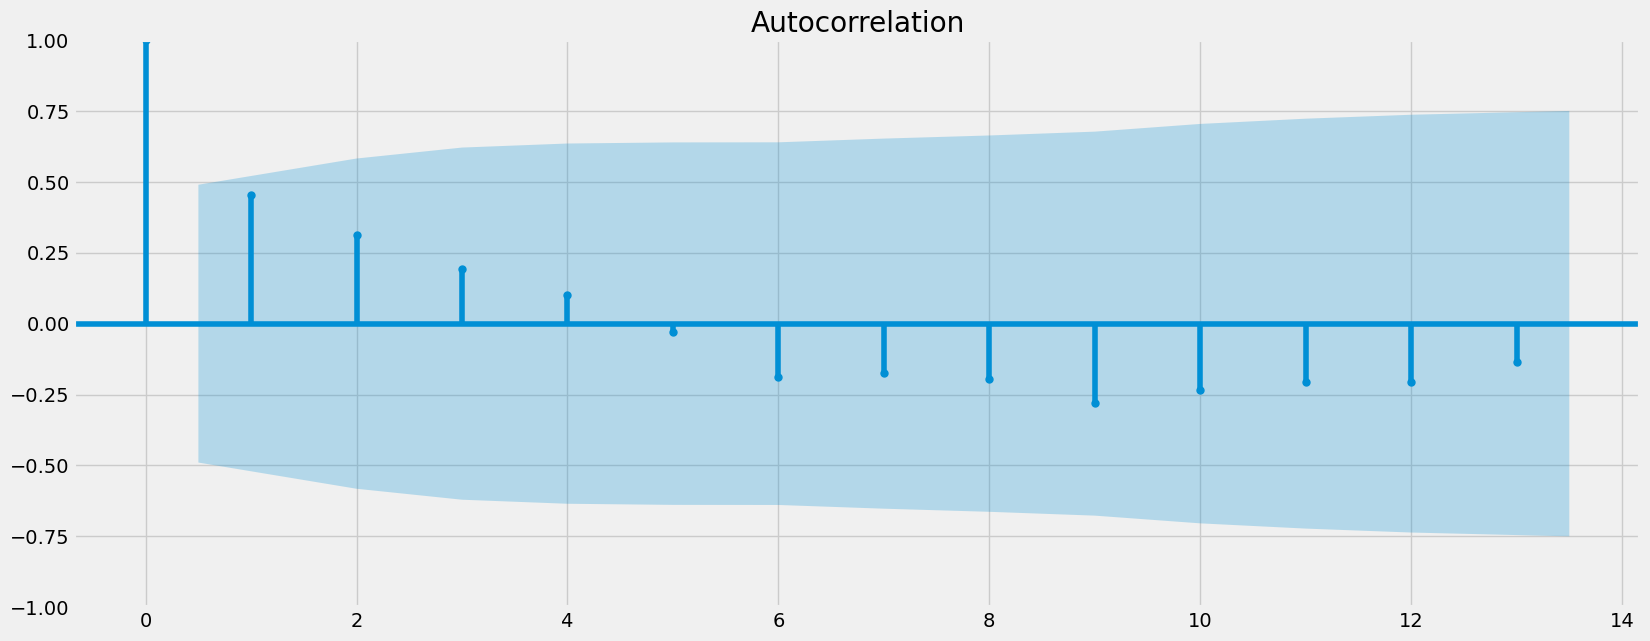

In [46]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(result_1)
plt.show()

### Since the p-value is less than the significance level (0.05), we reject the null hypothesis of the Dickey-Fuller test, indicating that the time series is likely stationary. Therefore, differencing may not be necessary for further analysis or modeling.

In [48]:
# saving to csv
df_World.to_csv(os.path.join(path, '02 Data','prepared data', 'df_World_0624.csv'))

OSError: Cannot save file into a non-existent directory: 'C:\Users\ASUS\World Happiness Report 04.2024\02 Data\Prepared Data\02 Data\prepared data'